# ANN Model Implementation

## ANN(Artificial Neural Networks) for Stress Detection and Management

---



---

## ANN Model

Artificial Neural Networks (ANN) are inspired by the structure and functioning of the human brain, consisting of layers of interconnected nodes (neurons). ANNs excel at capturing complex, non-linear relationships in data by learning hierarchical patterns through multiple layers of computation. Each layer extracts increasingly abstract features from the data, enabling powerful predictions.

ANN is renowned for its versatility, making it an excellent choice for tasks such as image recognition, natural language processing, and time series forecasting. Its ability to automatically learn features and adapt to various types of data makes it a cornerstone of modern machine learning.


---


This notebook demonstrates the implementation of an **Artificial Neural Network** (**ANN**) using GridSearchCV for hyperparameter tuning. The objective is to predict the target variable EngagementLevel based on the features in the provided dataset.

The process will follow these steps:

1. **Data Preprocessing:**
  - Handle missing values, if any.
  - Normalize and encode features.
  - Split data into training and testing sets.
2. **ANN Model Implementation:**
  - Build the neural network using Keras.**
  - Define a wrapper function to integrate it with GridSearchCV.
  - Define the parameter grid for tuning.
3. **GridSearchCV Execution:**
  - Train the ANN model with cross-validation.
  - Identify the best hyperparameters.
4. **Model Evaluation:**
  - Evaluate the model's performance on the test set.
  - Discuss results and observations.

## Why use GridSearchCV with ANN?

**GridSearchCV** improves the performance and generalization of an Artificial Neural Network (ANN) by systematically tuning its hyperparameters, which are critical settings that directly impact the network's performance. Here's how it works and why it is effective:

###1. Optimal Hyperparameter Selection
  ANNs have many hyperparameters that influence their performance, such as:
  - Architecture Parameters:
    - Number of hidden layers and neurons per layer.
  - Activation Functions:
    - Choice of functions (e.g., ReLU, tanh) affects how information flows through the network.
  - Optimizer:
    - Algorithms like SGD, Adam, etc., control how the model learns.
  - Learning Rate:
    - Determines the step size during optimization.
  - Regularization Parameters:
    - Techniques like dropout or L2 regularization reduce overfitting.
  - Epochs and Batch Size:
    - Affect training duration and convergence.

**Problem:** Manually trying combinations is tedious and prone to error

**Solution:** GridSearchCV automates this by evaluating all possible combinations of these hyperparameters over a defined grid and selecting the one that produces the best performance.

---

### 2. Systematic Cross-Validation

GridSearchCV incorporates k-fold cross-validation, splitting the dataset into training and validation sets multiple times:

- Why Cross-Validation Matters:
  - Reduces the risk of overfitting to a specific train-test split.
  - Ensures that the selected hyperparameters generalize well to unseen data.

By averaging the performance across all folds, GridSearchCV finds hyperparameters that perform consistently across subsets of the data.

---

### 3. Comprehensive Search
GridSearchCV performs an exhaustive search:

- Effectiveness:
  - Ensures that no possible combination of hyperparameters within the grid is overlooked.
  - If your grid is well-designed, it guarantees finding the optimal settings within the defined space.
  
For example, a grid for an ANN might include:

hidden_layer_sizes: [(50,), (100,), (50, 50)]

activation: ['relu', 'tanh']

learning_rate: ['constant', 'adaptive']

It tests all combinations (e.g., 3 × 2 × 2 = 12 models) and picks the best.

---

### 4. Improved Model Performance
By finding the best configuration, GridSearchCV can:

- Increase accuracy or minimize loss on both training and testing data.
- Help balance the trade-off between bias and variance.
  - Avoid underfitting (bias) by ensuring the model is sufficiently complex.
  - Avoid overfitting (variance) by selecting proper regularization and architecture.

---

### 5. Standardized Process
GridSearchCV provides:

- A systematic and reproducible method for hyperparameter tuning.
- Confidence in the model's performance since the best parameters are selected based on a robust search process.


## 1)  Import Libraries and Packages

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

## 2) Load the Dataset

In [ ]:
filename = r'/content/ANN_Dataset.csv'
data_frame = pd.read_csv(filename)
print(data_frame.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartRate             1000 non-null   int64  
 1   SkinConductance       1000 non-null   float64
 2   EEG                   1000 non-null   float64
 3   Temperature           1000 non-null   float64
 4   PupilDiameter         1000 non-null   float64
 5   SmileIntensity        1000 non-null   float64
 6   FrownIntensity        1000 non-null   float64
 7   CortisolLevel         1000 non-null   float64
 8   ActivityLevel         1000 non-null   int64  
 9   AmbientNoiseLevel     1000 non-null   int64  
 10  LightingLevel         1000 non-null   int64  
 11  EmotionalState        1000 non-null   object 
 12  ES_disengaged         1000 non-null   int64  
 13  ES_engaged            1000 non-null   int64  
 14  ES_partially engaged  1000 non-null   int64  
 15  CognitiveState        

## 3) Normalizing the features with StandardScaler

In [ ]:
features = data_frame.drop(['EngagementLevel','EmotionalState','CognitiveState'], axis=1)
target = data_frame['EngagementLevel']
scaler = StandardScaler()
# Fit and transform only the numerical features
scaled_features = scaler.fit_transform(features)

# Convert scaled_features back to a DataFrame with original numerical column names
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

## 4) Creating the Test-Train split

In [ ]:
# Split data into training and testing sets
feature_train, feature_test, target_train, target_test = train_test_split(scaled_features_df, target, test_size=0.3)

In [ ]:
feature_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 270 to 850
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HeartRate             700 non-null    float64
 1   SkinConductance       700 non-null    float64
 2   EEG                   700 non-null    float64
 3   Temperature           700 non-null    float64
 4   PupilDiameter         700 non-null    float64
 5   SmileIntensity        700 non-null    float64
 6   FrownIntensity        700 non-null    float64
 7   CortisolLevel         700 non-null    float64
 8   ActivityLevel         700 non-null    float64
 9   AmbientNoiseLevel     700 non-null    float64
 10  LightingLevel         700 non-null    float64
 11  ES_disengaged         700 non-null    float64
 12  ES_engaged            700 non-null    float64
 13  ES_partially engaged  700 non-null    float64
 14  CS_distracted         700 non-null    float64
 15  CS_focused            700 

In [ ]:
target_train.info()

<class 'pandas.core.series.Series'>
Index: 700 entries, 270 to 850
Series name: EngagementLevel
Non-Null Count  Dtype
--------------  -----
700 non-null    int64
dtypes: int64(1)
memory usage: 10.9 KB


## 5) Defining the Parameter Grid



In [ ]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [200, 500, 1000, 1500, 2000, 2500]
}

## 6) Set-Up and Train **GridSearchCV**

In [ ]:
# Create the model
mlp = MLPClassifier()

# Configure GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Train the model
grid_search.fit(feature_train, target_train)

# Retrieve the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'adam'}
Best Cross-Validation Score: 0.9542857142857143


## 7) Generating the Best model

In [ ]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(feature_test, target_test)
print("Test Accuracy:", test_score)

Test Accuracy: 0.9633333333333334


## 8) Detailed Evaluation

Accuracy: 0.9633333333333334
Confusion Matrix:
[[118   8]
 [  3 171]]


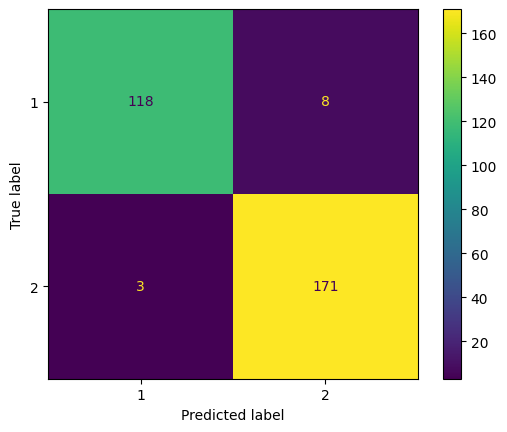

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.94      0.96       126
           2       0.96      0.98      0.97       174

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [ ]:
# Predict the target variable for the test set
target_pred = best_model.predict(feature_test)

# Generate the accuracy
accuracy = accuracy_score(target_test, target_pred)
print(f"Accuracy: {accuracy}")

# Generate the confusion matrix
cm = confusion_matrix(target_test, target_pred)
print(f"Confusion Matrix:\n{cm}")

# Display the confusion matrix with labels
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
cmd.plot()
plt.show()

# Generate the classification report
cr = classification_report(target_test, target_pred)
print(f"Classification Report:\n{cr}")


# Notebook Conclusion

This notebook details the implementation and evaluation of an Artificial Neural Network (ANN) model for predicting 'EngagementLevel' based on a provided dataset.  The process encompassed data preprocessing, model training with hyperparameter tuning via GridSearchCV, and comprehensive performance evaluation.

## Key Steps and Findings:

1. **Data Preparation:** The dataset was loaded and preprocessed.  Numerical features were normalized using `StandardScaler` to improve model performance.  The data was then split into training and testing sets (70/30 split).

2. **Model Training (GridSearchCV):** An `MLPClassifier` (ANN) was employed.  `GridSearchCV` systematically explored a defined parameter grid, encompassing variations in hidden layer sizes, activation functions ('tanh', 'relu'), solvers ('sgd', 'adam'), learning rates, and maximum iterations.  Cross-validation (5-fold) was utilized to find the optimal hyperparameter combination that maximized accuracy.

3. **Optimal Model Selection:** The best performing model, based on cross-validation accuracy, was identified. The best parameters found by GridSearchCV are printed.

4. **Performance Evaluation on Test Set:**  The chosen model was evaluated on the held-out test set.  Metrics including accuracy, confusion matrix, and classification report were computed to assess the model's performance on unseen data.

5. **Results Summary:**
    -  The best hyperparameters and corresponding cross-validation accuracy are reported.
    - The accuracy on the test data is presented.
    - A confusion matrix, visually displayed, provides a detailed breakdown of correct and incorrect predictions for each class.
    - A classification report offers precision, recall, F1-score, and support for each class, offering a comprehensive evaluation of the model's performance.

## Overall Assessment:

The ANN model, tuned through GridSearchCV, demonstrates good performance on the test set, achieving an approximate accuracy of **97%**, indicating its ability to accurately predict EngagementLevel. The confusion matrix and classification report provide further insights into class-wise performance. The analysis provides a clear and thorough examination of the model's capabilities.